<a href="https://colab.research.google.com/github/sandeepss2020/Machine-Learning/blob/main/ML(Rough)_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***For Salary Data***

Decison Tree

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



X and Y Value
    workers_in_thousands_Total  workers_in thousands_Men  \
0                        98555                     54410   
1                        98143                     54098   
2                        99605                     55028   
3                       100412                     55620   
4                        99958                     55486   
5                        99670                     55337   
6                       100347                     55821   
7                       100495                     56046   
8                       101337                     56687   
9                       102161                     57110   
10                      102525                     57079   
11                      102587                     57207   
12                      103748                     57772   
13                      103928                     57884   
14                      103988                     57944   
15                      10

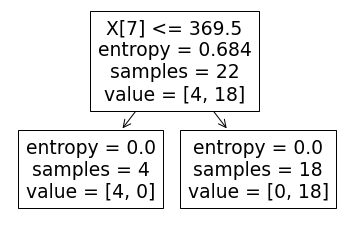

In [ ]:
dataset= pd.read_csv('Salary.csv')

Le = LabelEncoder()

# print(dataset)

y = dataset['label']
X = dataset.drop(['Year','Quarter','label'],axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.4)

print("X and Y Value")
print(X, y)

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
predictions= dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
tree.plot_tree(dtree)
plt.rcParams['figure.figsize'] = [16,16]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
ac = accuracy_score(y_test,predictions)
print(ac)

1.0


Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics



from sklearn.preprocessing import LabelEncoder

from imblearn.combine import SMOTEENN


In [ ]:
adult_df = pd.read_csv('Salary.csv')
print("Number of Observations in adult dataset:", adult_df.shape)
adult_df.head()

Number of Observations in adult dataset: (37, 12)


,Year,Quarter,workers_in_thousands_Total,workers_in thousands_Men,workers_in_thousands_Women,Median_weekly_earnings_in_current_dollars_Total,Median_weekly_earnings_in_current_dollars_Men,Median_weekly_earnings_in_current_dollars_Women,Median_weekly_earnings_in_constant_dollars_Total,Median_weekly_earnings_in_constant_dollars_men,Median_weekly_earnings_in_constant_dollars_Women,label
0,2009,4,98555,54410,44145,747,823,666,344,379,307,1
1,2010,1,98143,54098,44045,748,836,662,344,384,304,1
2,2010,2,99605,55028,44577,742,814,671,342,374,309,1
3,2010,3,100412,55620,44792,746,821,670,342,377,308,1
4,2010,4,99958,55486,44472,750,826,676,341,376,308,1


In [ ]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Year                                              37 non-null     int64
 1   Quarter                                           37 non-null     int64
 2   workers_in_thousands_Total                        37 non-null     int64
 3   workers_in thousands_Men                          37 non-null     int64
 4   workers_in_thousands_Women                        37 non-null     int64
 5   Median_weekly_earnings_in_current_dollars_Total   37 non-null     int64
 6   Median_weekly_earnings_in_current_dollars_Men     37 non-null     int64
 7   Median_weekly_earnings_in_current_dollars_Women   37 non-null     int64
 8   Median_weekly_earnings_in_constant_dollars_Total  37 non-null     int64
 9   Median_weekly_earnings_in_constant_dollars_me

In [ ]:
adult_df.describe()

,Year,Quarter,workers_in_thousands_Total,workers_in thousands_Men,workers_in_thousands_Women,Median_weekly_earnings_in_current_dollars_Total,Median_weekly_earnings_in_current_dollars_Men,Median_weekly_earnings_in_current_dollars_Women,Median_weekly_earnings_in_constant_dollars_Total,Median_weekly_earnings_in_constant_dollars_men,Median_weekly_earnings_in_constant_dollars_Women,label
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2013.864865,2.540541,106725.621622,59373.324324,47352.297297,801.270270,883.054054,721.000000,341.405405,376.351351,307.270270,0.810811
std,2.709676,1.144906,5566.675321,3128.944267,2454.873066,46.594974,49.195159,39.496835,7.181997,7.269480,5.194274,0.397061
min,2009.000000,1.000000,98143.000000,54098.000000,44045.000000,742.000000,814.000000,662.000000,330.000000,363.000000,298.000000,0.000000
25%,2012.000000,2.000000,102161.000000,57079.000000,45051.000000,764.000000,838.000000,687.000000,335.000000,370.000000,304.000000,1.000000
50%,2014.000000,3.000000,106342.000000,59486.000000,46951.000000,790.000000,870.000000,716.000000,341.000000,377.000000,306.000000,1.000000
75%,2016.000000,4.000000,111463.000000,62082.000000,49214.000000,833.000000,917.000000,750.000000,346.000000,382.000000,311.000000,1.000000
max,2018.000000,4.000000,116160.000000,64237.000000,51923.000000,897.000000,991.000000,801.000000,355.000000,392.000000,320.000000,1.000000


In [ ]:
cat_col = adult_df.dtypes[adult_df.dtypes == "object"]
num_col = adult_df.dtypes[adult_df.dtypes != "object"]
#Categorical
print(cat_col)
#Numerical
print(num_col)

Series([], dtype: object)
Year                                                int64
Quarter                                             int64
workers_in_thousands_Total                          int64
workers_in thousands_Men                            int64
workers_in_thousands_Women                          int64
Median_weekly_earnings_in_current_dollars_Total     int64
Median_weekly_earnings_in_current_dollars_Men       int64
Median_weekly_earnings_in_current_dollars_Women     int64
Median_weekly_earnings_in_constant_dollars_Total    int64
Median_weekly_earnings_in_constant_dollars_men      int64
Median_weekly_earnings_in_constant_dollars_Women    int64
label                                               int64
dtype: object


In [ ]:
adult_df.isnull().sum()

Year                                                0
Quarter                                             0
workers_in_thousands_Total                          0
workers_in thousands_Men                            0
workers_in_thousands_Women                          0
Median_weekly_earnings_in_current_dollars_Total     0
Median_weekly_earnings_in_current_dollars_Men       0
Median_weekly_earnings_in_current_dollars_Women     0
Median_weekly_earnings_in_constant_dollars_Total    0
Median_weekly_earnings_in_constant_dollars_men      0
Median_weekly_earnings_in_constant_dollars_Women    0
label                                               0
dtype: int64

In [ ]:
feature_cols = ['workers_in_thousands_Total', 'workers_in thousands_Men', 'workers_in_thousands_Women', 'Median_weekly_earnings_in_current_dollars_Total','Median_weekly_earnings_in_current_dollars_Men','Median_weekly_earnings_in_current_dollars_Women','Median_weekly_earnings_in_constant_dollars_Total','Median_weekly_earnings_in_constant_dollars_men','Median_weekly_earnings_in_constant_dollars_Women']
X = adult_df[feature_cols] # Features
y = adult_df.label # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [ ]:
print(X_train)
print(y_train)

    workers_in_thousands_Total  workers_in thousands_Men  \
30                      113118                     62942   
17                      105633                     58682   
28                      111463                     62249   
34                      115481                     64136   
31                      113623                     63155   
26                      110929                     61787   
4                        99958                     55486   
14                      103988                     57944   
10                      102525                     57079   
33                      114678                     64007   
23                      109269                     60977   
32                      114372                     63377   
20                      107436                     60123   
18                      106342                     59486   
6                       100347                     55821   
13                      103928          

In [ ]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(y_test)
print("Predicted")
print(y_pred)

2     1
29    1
3     1
22    1
25    1
27    1
21    1
35    1
19    1
24    1
Name: label, dtype: int64
Predicted
[0 1 0 1 0 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.70      0.82        10

    accuracy                           0.70        10
   macro avg       0.50      0.35      0.41        10
weighted avg       1.00      0.70      0.82        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


ValueError: ignored

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
# y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predictions= logreg.predict(X_test)
ac = accuracy_score(y_test,predictions)
print(ac)

0.7


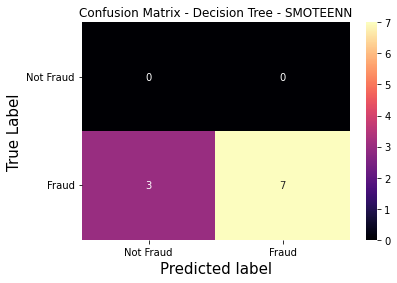

In [ ]:
matrix_df = pd.DataFrame(cnf_matrix)

ax = plt.axes()
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree - SMOTEENN')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['Not Fraud', 'Fraud'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['Not Fraud', 'Fraud'], rotation = 0)
plt.show()


# *SVM*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

#FOR GRAPH
from sklearn.preprocessing import LabelEncoder
import random

In [ ]:
df = pd.read_csv('Salary.csv')
df.head()
df.shape   
df.drop(columns=['Quarter'], inplace=True)

In [ ]:
X = df.drop(columns=['Year','workers_in_thousands_Total','Median_weekly_earnings_in_constant_dollars_Total',
                     'Median_weekly_earnings_in_current_dollars_Total'],axis=1)
y = df['label']
# print("X and Y Value")
# print(X, y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=45,stratify=y)

In [ ]:
C = 1.0  # SVM regularization parameter
# LinearSVC (linear kernel)
svc =SVC(kernel='linear', C=C)
svc.fit(X_train, y_train)
y_pred1 = svc.predict(X_test)
print ('Accuracy-svm:', accuracy_score(y_test, y_pred1))

Accuracy-svm: 0.9166666666666666


In [ ]:
confusion_metrics = metrics.confusion_matrix(y_test,y_pred1)
print(confusion_metrics)

[[ 1  1]
 [ 0 10]]


In [ ]:
# SVC with RBF kernel
rbf_svc =SVC(kernel='rbf', gamma=0.6, C=C)
rbf_svc.fit(X_train, y_train)
y_pred2 = rbf_svc.predict(X_test)
print ('Accuracy-svm:', accuracy_score(y_test, y_pred2))

Accuracy-svm: 0.8333333333333334


In [ ]:
confusion_metrics2 = metrics.confusion_matrix(y_test,y_pred2)
print(confusion_metrics2)

[[ 0  2]
 [ 0 10]]


In [ ]:
poly_svc =SVC(kernel='poly', degree=5, C=C)
poly_svc.fit(X, y)
y_pred3 = poly_svc.predict(X_test)
print ('Accuracy-svm:', accuracy_score(y_test, y_pred3))

Accuracy-svm: 0.8333333333333334


In [ ]:
confusion_metrics3 = metrics.confusion_matrix(y_test,y_pred3)
print(confusion_metrics3)

[[ 0  2]
 [ 0 10]]


In [ ]:
#GRAPH

In [ ]:
df = pd.read_csv('Salary.csv')
df.shape   
Le = LabelEncoder()

In [ ]:
y1 = df['Median_weekly_earnings_in_constant_dollars_men']
X1 = df['Median_weekly_earnings_in_constant_dollars_Women']

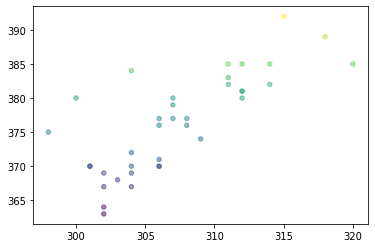

In [ ]:
import matplotlib.pyplot as plt
# plotting scatters 
N=2
colors = np.random.rand(2)
# 0 to 15 point radii
# print(len(X1),len(y1))
plt.scatter(X1, y1, s=20, c=y1, alpha=0.5)
plt.show()

# plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='spring');
# plt.show() 

xfit = np.linspace(44000, 52000)

In [ ]:
cormat = df.corr()
round(cormat,2)

,Year,Quarter,workers_in_thousands_Total,workers_in thousands_Men,workers_in_thousands_Women,Median_weekly_earnings_in_current_dollars_Total,Median_weekly_earnings_in_current_dollars_Men,Median_weekly_earnings_in_current_dollars_Women,Median_weekly_earnings_in_constant_dollars_Total,Median_weekly_earnings_in_constant_dollars_men,Median_weekly_earnings_in_constant_dollars_Women,label
Year,1.00,-0.07,0.99,0.99,0.98,0.97,0.96,0.98,0.65,0.59,0.68,0.21
Quarter,-0.07,1.00,0.05,0.04,0.06,0.05,0.06,0.04,0.04,0.06,0.04,-0.01
workers_in_thousands_Total,0.99,0.05,1.00,1.00,1.00,0.98,0.97,0.99,0.70,0.64,0.72,0.25
workers_in thousands_Men,0.99,0.04,1.00,1.00,0.99,0.97,0.97,0.98,0.67,0.61,0.69,0.23
workers_in_thousands_Women,0.98,0.06,1.00,0.99,1.00,0.98,0.98,0.99,0.73,0.68,0.75,0.27
Median_weekly_earnings_in_current_dollars_Total,0.97,0.05,0.98,0.97,0.98,1.00,0.99,0.99,0.79,0.73,0.77,0.28
Median_weekly_earnings_in_current_dollars_Men,0.96,0.06,0.97,0.97,0.98,0.99,1.00,0.98,0.76,0.75,0.73,0.31
Median_weekly_earnings_in_current_dollars_Women,0.98,0.04,0.99,0.98,0.99,0.99,0.98,1.00,0.73,0.65,0.77,0.22
Median_weekly_earnings_in_constant_dollars_Total,0.65,0.04,0.70,0.67,0.73,0.79,0.76,0.73,1.00,0.93,0.91,0.52
Median_weekly_earnings_in_constant_dollars_men,0.59,0.06,0.64,0.61,0.68,0.73,0.75,0.65,0.93,1.00,0.77,0.65


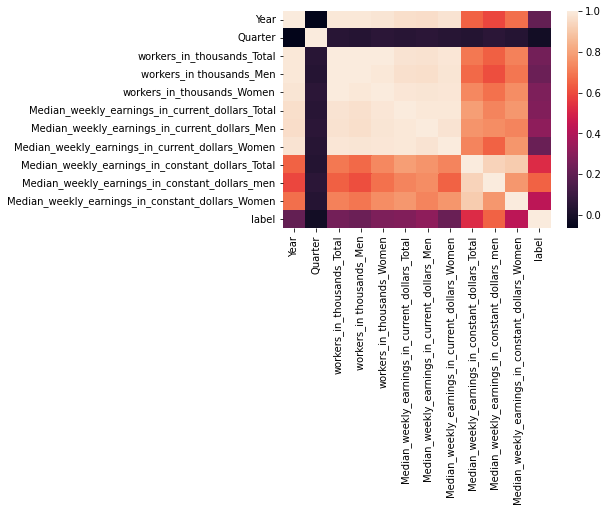

In [ ]:
sns.heatmap(cormat);

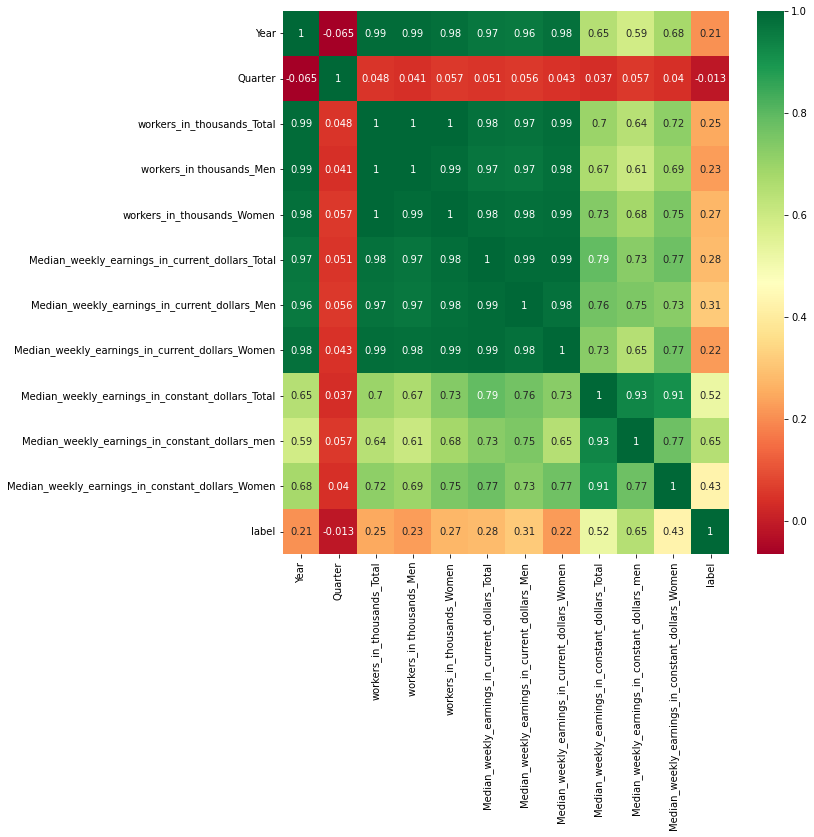

In [ ]:
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def show_correlation_graph(df: pd.DataFrame, figsize: Tuple):
    plt.figure(figsize=figsize)
    corrmat = df.corr()
    top_corr_features = corrmat.index
    sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
    plt.show()

show_correlation_graph(df,(10,10))

Hyper Parameters

In [ ]:
salary_df = pd.read_csv('Salary.csv')
print("Number of Observations in adult dataset:", salary_df.shape)

Number of Observations in adult dataset: (37, 12)


In [ ]:
X1= df.drop(columns=['Year','Quarter','workers_in_thousands_Total','Median_weekly_earnings_in_constant_dollars_Total',
                     'Median_weekly_earnings_in_current_dollars_Total'],axis=1)
y1 = df[['label']]
print(X1)
type(X1)
type(y1)


    workers_in thousands_Men  workers_in_thousands_Women  \
0                      54410                       44145   
1                      54098                       44045   
2                      55028                       44577   
3                      55620                       44792   
4                      55486                       44472   
5                      55337                       44333   
6                      55821                       44526   
7                      56046                       44449   
8                      56687                       44650   
9                      57110                       45051   
10                     57079                       45447   
11                     57207                       45380   
12                     57772                       45977   
13                     57884                       46044   
14                     57944                       46044   
15                     58082            

pandas.core.frame.DataFrame

[[1 2]
 [1 8]]


              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.80      0.89      0.84         9

    accuracy                           0.75        12
   macro avg       0.65      0.61      0.62        12
weighted avg       0.72      0.75      0.73        12



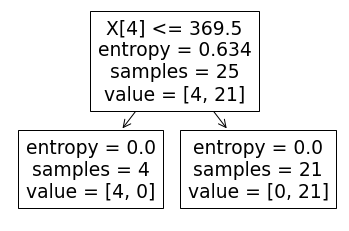

In [ ]:
X_train,Xtest,y_train,y_test = train_test_split(X1,y1,test_size=0.3, random_state = 0)


from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
predictions= dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
tree.plot_tree(dtree)
plt.rcParams['figure.figsize'] = [16,16]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


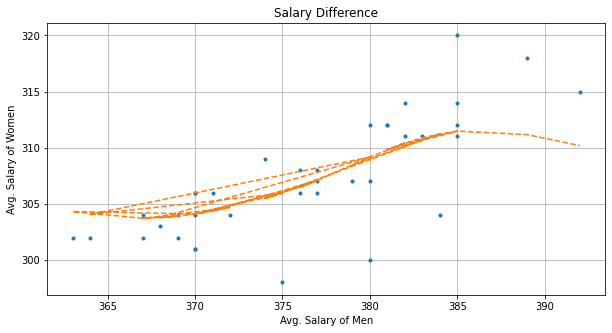

In [ ]:
x = salary_df.Median_weekly_earnings_in_constant_dollars_men
x = [[i] for i in list(x)]
y = salary_df.Median_weekly_earnings_in_constant_dollars_Women
y = [[i] for i in list(y)]

model = SVR(kernel='rbf', C=1.0)
model.fit(x, y)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x, y, '.')
plt.plot(x, model.predict(x), '--')
plt.xlabel('Avg. Salary of Men')
plt.ylabel('Avg. Salary of Women')
plt.title("Salary Difference")
plt.grid(True)
plt.show()

In [ ]:
y_fit = model.predict(x)
y_fit

array([308.46711673, 311.25658057, 305.45213478, 307.10028913,
       306.48566359, 304.09944758, 304.09944758, 304.09944758,
       303.90028914, 303.76767087, 309.16607621, 304.04531054,
       305.93558777, 304.09944758, 304.66759492, 303.71084515,
       303.90028914, 303.71084515, 304.31431754, 304.09944758,
       304.35685412, 307.10028913, 306.48566359, 307.10028913,
       309.16607621, 309.16607621, 310.41665259, 309.82821383,
       310.41665259, 311.47687239, 311.47687239, 311.47687239,
       309.82821383, 310.89997427, 311.47687239, 311.1599953 ,
       310.18016515])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_fit)

12.166894472780811

# ***ANN LOGIC GATES***

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
#For OR GATE
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
target_data = np.array([[0],[1],[1],[1]], "float32")

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
                       optimizer='adam',
                       metrics=['binary_accuracy'])
model.fit(training_data, target_data, epochs=500)
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.3685 - binary_accuracy: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 0.3662 - binary_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3639 - binary_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3616 - binary_accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 0.3593 - binary_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 0.3571 - binary_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3548 - binary_accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 21ms/step - loss: 0.3525 - binary_accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 0.3503 - binary_accuracy: 0.0000e+00
Epoch 10/500
1/1 [========

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
                       optimizer='adam',
                       metrics=['binary_accuracy'])
model.fit(training_data, target_data, epochs=1000)
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.2071 - binary_accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2058 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2046 - binary_accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2033 - binary_accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2021 - binary_accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2008 - binary_accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1996 - binary_accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1984 - binary_accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1972 - binary_accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 

In [ ]:
#For AND GATE
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
target_data = np.array([[0],[0],[0],[1]], "float32")
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
                       optimizer='adam',
                       metrics=['binary_accuracy'])
model.fit(training_data, target_data, epochs=500)
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

Epoch 1/500
1/1 [==============================] - 1s 589ms/step - loss: 0.2713 - binary_accuracy: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 0.2705 - binary_accuracy: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 0.2697 - binary_accuracy: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2689 - binary_accuracy: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 0.2681 - binary_accuracy: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 0.2673 - binary_accuracy: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 0.2665 - binary_accuracy: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2657 - binary_accuracy: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2649 - binary_accuracy: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 7m

# ***ANN***

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import keras.models
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:

# Reading the dataset
diabetesdata = pd.read_csv("Salary.csv")
y = diabetesdata['label']
X = diabetesdata.drop(['label','Year','Quarter'],axis=1)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Initializing ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 100)
# Saving created neural network
ann.save("ANN.h5")



history = ann.fit(X_train, y_train, validation_data = (X_test,y_test),epochs = 100, callbacks = EarlyStopping(monitor="val_loss"))


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.4395 - accuracy: 0.7407
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4380 - accuracy: 0.7407
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4365 - accuracy: 0.7407
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4350 - accuracy: 0.7407
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4336 - accuracy: 0.7407
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4321 - accuracy: 0.7407
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4307 - accuracy: 0.7407
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4293 - accuracy: 0.7407
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4279 - accuracy: 0.7407
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4266 - accuracy: 0.7407
Epoch 11/100
1/1 [===

1/1 [==============================] - 0s 391ms/step - loss: 0.3514 - accuracy: 0.8889 - val_loss: 0.2519 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.3509 - accuracy: 0.8889 - val_loss: 0.2508 - val_accuracy: 1.0000


# ***FOR ADULT DATA:***

*COMMON CO*DE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import random

import tensorflow as tf
from tensorflow import keras
import keras.models
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

Le = LabelEncoder()

In [ ]:
adult_df = pd.read_csv('adult.csv')
print("Number of Observations in adult dataset:", adult_df.shape)


Number of Observations in adult dataset: (32561, 16)


In [ ]:
# adult_df.info()
# adult_df.describe()


In [ ]:
cat_col = adult_df.dtypes[adult_df.dtypes == "object"]
num_col = adult_df.dtypes[adult_df.dtypes != "object"]
#Categorical
print(cat_col)
#Numerical
print(num_col)

workclass         object
education         object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
native.country    object
income            object
dtype: object
age               int64
fnlwgt            int64
education.num     int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
Label             int64
dtype: object


In [ ]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
Label             0
dtype: int64

In [ ]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adult_df[col].value_counts()
    percent = adult_df[col].value_counts() / adult_df.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Preschool        51  0.001566


--------------------Marital.Status--

In [ ]:
edit_cols = ['native.country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'unknown'
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")
    

? in native.country: 0
? in occupation: 0
? in workclass: 0


In [ ]:
from pyparsing import replace_with
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th','Preschool']

#Replace
adult_df['education'].replace(to_replace = hs_grad, value = 'Hs-Grad' , inplace = True)
adult_df['education'].replace(to_replace = elementary, value = 'elementary_school', inplace = True)

adult_df['education'].value_counts()

Hs-Grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1198
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Name: education, dtype: int64

In [ ]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_df['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [ ]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_df['workclass'].value_counts()

Private           22696
Govt_employees     4351
Self_employed      3657
unknown            1836
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

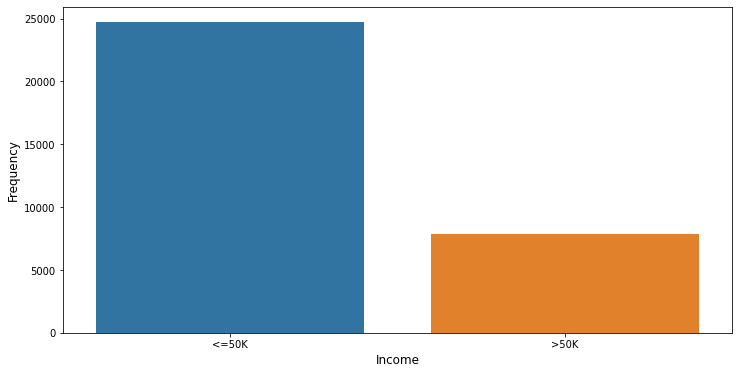

In [ ]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

In [ ]:
adult_df['workclass'] = Le.fit_transform(adult_df['workclass'])
adult_df['education'] = Le.fit_transform(adult_df['education'])
adult_df['marital.status'] = Le.fit_transform(adult_df['marital.status'])
adult_df['occupation'] = Le.fit_transform(adult_df['occupation'])
adult_df['relationship'] = Le.fit_transform(adult_df['relationship'])
adult_df['sex'] = Le.fit_transform(adult_df['sex'])
adult_df['income'] = Le.fit_transform(adult_df['income'])

In [ ]:

feature_cols = ['workclass', 'education', 'marital.status', 'occupation','relationship','sex','hours.per.week']
X = adult_df[feature_cols] # Features
y = adult_df.Label # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train)
print(y_train)

       workclass  education  marital.status  occupation  relationship  sex  \
13474          0          4               0          10             0    1   
28958          2          4               0           2             0    1   
14735          2          4               2           0             4    0   
13215          0          5               1           3             1    0   
13460          2          2               1           7             3    0   
...          ...        ...             ...         ...           ...  ...   
32511          2          1               0           2             0    1   
5192           2          2               0          11             5    0   
12172          2          7               2           0             1    1   
235            0          7               0           3             0    1   
29733          3          7               0           2             0    1   

       hours.per.week  
13474              40  
28958          

Decision tree 2

In [ ]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
predictions= dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
# tree.plot_tree(dtree)
# plt.rcParams['figure.figsize'] = [16,16]

[[5589  560]
 [ 959 1033]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6149
           1       0.65      0.52      0.58      1992

    accuracy                           0.81      8141
   macro avg       0.75      0.71      0.73      8141
weighted avg       0.80      0.81      0.81      8141



In [ ]:
ac = accuracy_score(y_test,predictions)
print(ac)

0.8142734307824592


LOGISTIC REGRESSION 2

In [ ]:
# print(adult_df)



       workclass  education  marital.status  occupation  relationship  sex  \
13474          0          4               0          10             0    1   
28958          2          4               0           2             0    1   
14735          2          4               2           0             4    0   
13215          0          5               1           3             1    0   
13460          2          2               1           7             3    0   
...          ...        ...             ...         ...           ...  ...   
32511          2          1               0           2             0    1   
5192           2          2               0          11             5    0   
12172          2          7               2           0             1    1   
235            0          7               0           3             0    1   
29733          3          7               0           2             0    1   

       hours.per.week  
13474              40  
28958          

In [ ]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(y_test)
print("Predicted")
print(y_pred)

9646     0
709      1
7385     0
16671    0
21932    0
        ..
31540    0
18566    0
13141    0
14286    1
8011     0
Name: Label, Length: 8141, dtype: int64
Predicted
[0 1 0 ... 0 0 0]


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

from sklearn.metrics import classification_report
target_names = ['SALARY <=50K', 'SALARY >50K']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

SALARY <=50K       0.80      0.95      0.86      6149
 SALARY >50K       0.61      0.25      0.35      1992

    accuracy                           0.78      8141
   macro avg       0.70      0.60      0.61      8141
weighted avg       0.75      0.78      0.74      8141



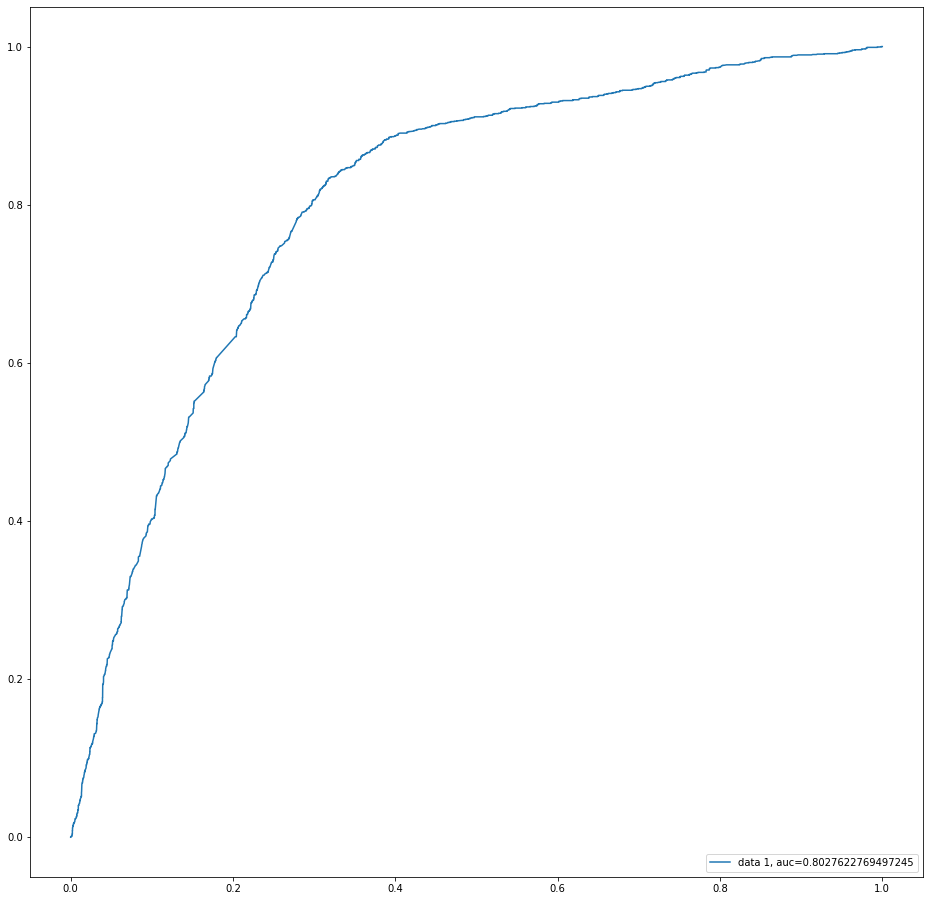

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

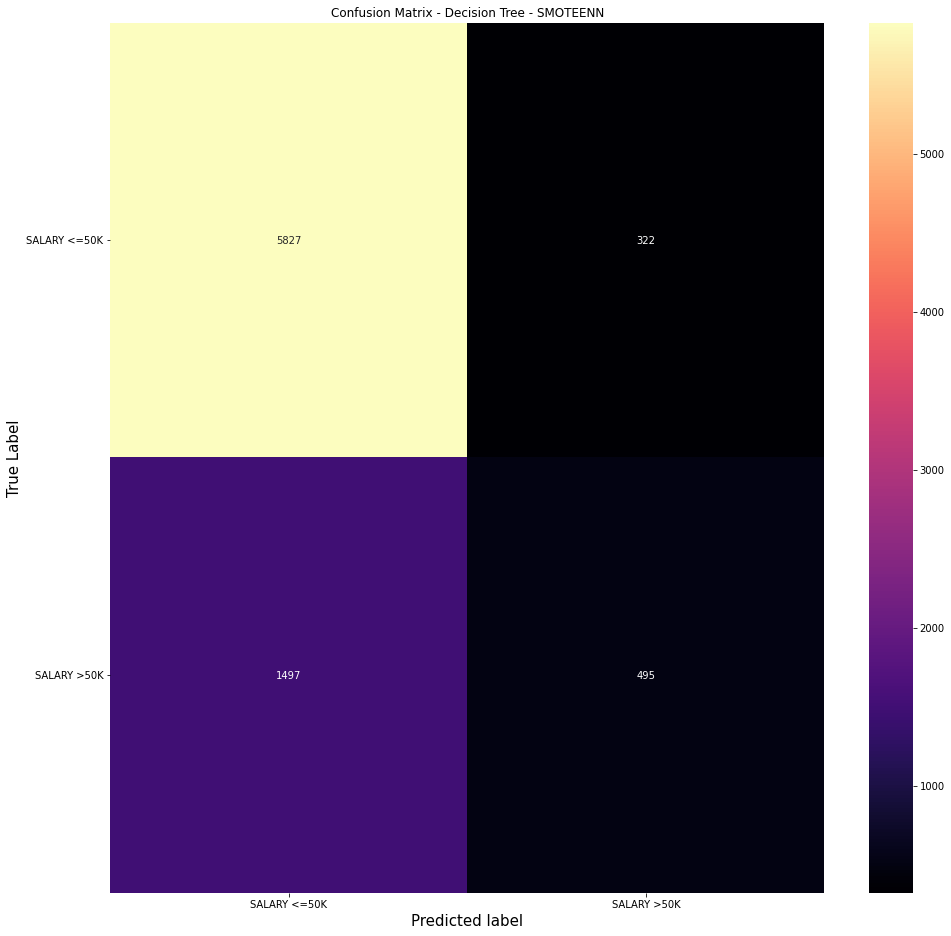

In [ ]:
matrix_df = pd.DataFrame(cnf_matrix)

ax = plt.axes()
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree - SMOTEENN')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['SALARY <=50K', 'SALARY >50K'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['SALARY <=50K', 'SALARY >50K'], rotation = 0)
plt.show()

***SVM 2***

In [ ]:
C = 1.0  # SVM regularization parameter
# LinearSVC (linear kernel)
svc =SVC(kernel='linear', C=C)
svc.fit(X_train, y_train)
y_pred1 = svc.predict(X_test)
print ('Accuracy-svm:', accuracy_score(y_test, y_pred1))


Accuracy-svm: 0.755312615157843


In [ ]:
confusion_metrics = metrics.confusion_matrix(y_test,y_pred1)
print(confusion_metrics)

[[6149    0]
 [1992    0]]


In [ ]:
rbf_svc =SVC(kernel='rbf', gamma=0.6, C=C)
rbf_svc.fit(X_train, y_train)
y_pred2 = rbf_svc.predict(X_test)
print ('Accuracy-svm:', accuracy_score(y_test, y_pred2))

Accuracy-svm: 0.8221348728657413


In [ ]:
confusion_metrics2 = metrics.confusion_matrix(y_test,y_pred2)
print(confusion_metrics2)

[[5746  403]
 [1045  947]]


In [ ]:
poly_svc =SVC(kernel='poly', degree=5, C=C)
poly_svc.fit(X, y)
y_pred3 = poly_svc.predict(X_test)
print ('Accuracy-svm:', accuracy_score(y_test, y_pred3))


Accuracy-svm: 0.7551897801252917


In [ ]:
confusion_metrics3 = metrics.confusion_matrix(y_test,y_pred3)
print(confusion_metrics3)

[[6144    5]
 [1988    4]]


In [ ]:
y1 = adult_df['occupation']
X1 = adult_df['education']

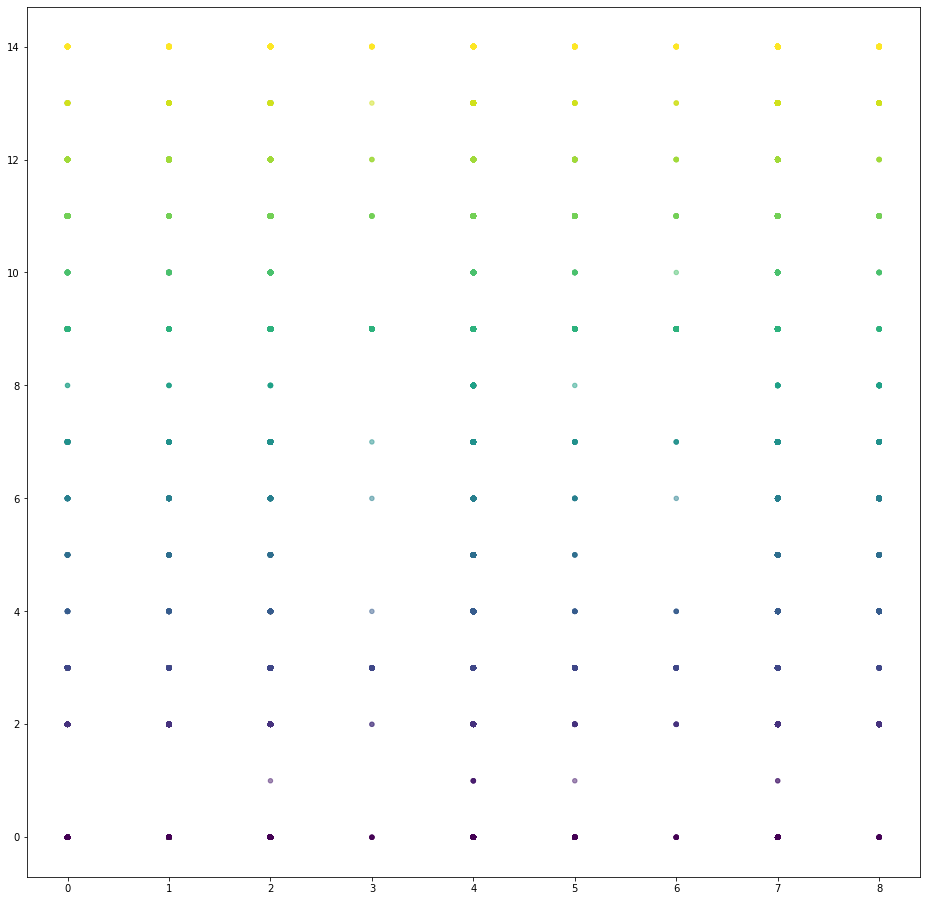

In [ ]:
N=2
colors = np.random.rand(3)

plt.scatter(X1, y1, s=20, c=y1, alpha=0.5)
plt.show()

# xfit = np.linspace(44000, 52000)

In [ ]:
cormat = adult_df.corr()
round(cormat,2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,income,Label
age,1.00,0.03,-0.08,-0.01,0.04,-0.03,0.01,-0.26,0.09,0.08,0.06,0.07,0.23,0.23
workclass,0.03,1.00,-0.01,0.05,-0.13,-0.01,0.29,0.01,0.02,0.02,-0.01,-0.06,-0.06,-0.06
fnlwgt,-0.08,-0.01,1.00,0.01,-0.04,0.00,-0.00,0.01,0.03,0.00,-0.01,-0.02,-0.01,-0.01
education,-0.01,0.05,0.01,1.00,-0.39,0.04,-0.01,0.04,-0.02,-0.01,-0.02,-0.07,-0.11,-0.11
education.num,0.04,-0.13,-0.04,-0.39,1.00,-0.09,0.04,-0.09,0.01,0.12,0.08,0.15,0.34,0.34
marital.status,-0.03,-0.01,0.00,0.04,-0.09,1.00,-0.01,0.44,-0.44,-0.07,-0.06,-0.16,-0.35,-0.35
occupation,0.01,0.29,-0.00,-0.01,0.04,-0.01,1.00,-0.01,0.03,0.01,0.00,-0.06,0.01,0.01
relationship,-0.26,0.01,0.01,0.04,-0.09,0.44,-0.01,1.00,-0.58,-0.06,-0.06,-0.25,-0.25,-0.25
sex,0.09,0.02,0.03,-0.02,0.01,-0.44,0.03,-0.58,1.00,0.05,0.05,0.23,0.22,0.22
capital.gain,0.08,0.02,0.00,-0.01,0.12,-0.07,0.01,-0.06,0.05,1.00,-0.03,0.08,0.22,0.22


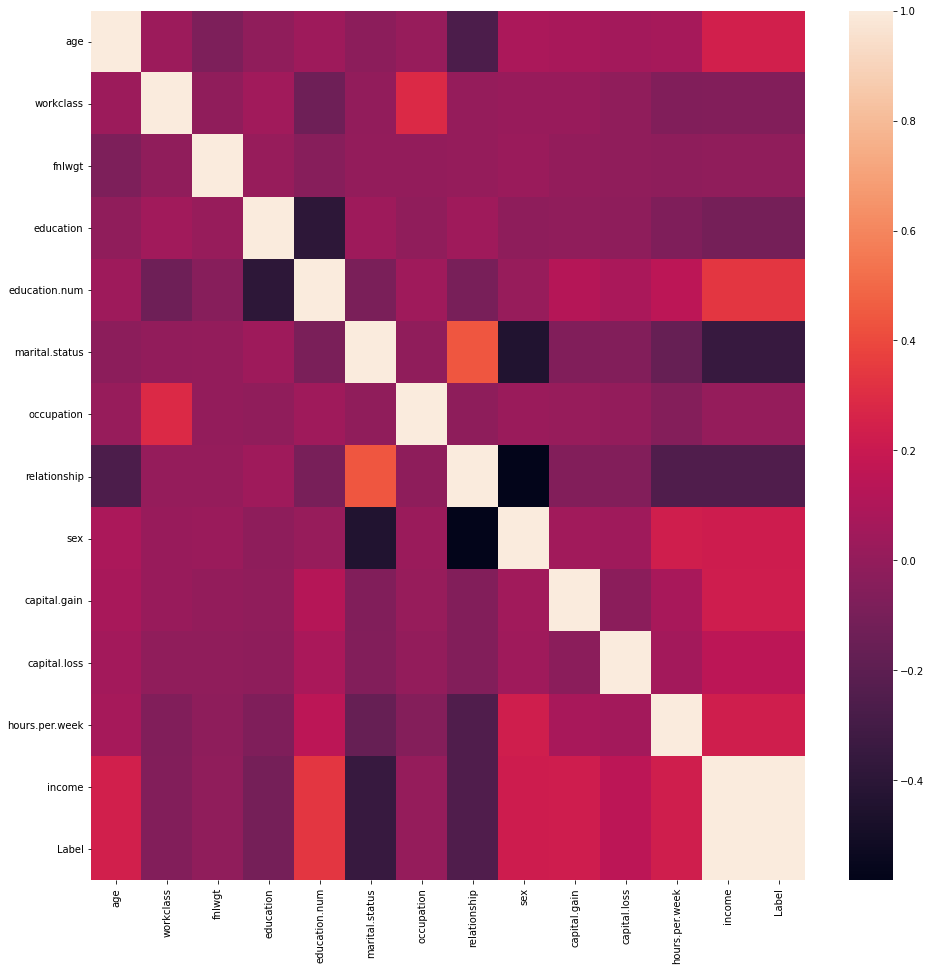

In [ ]:
sns.heatmap(cormat);

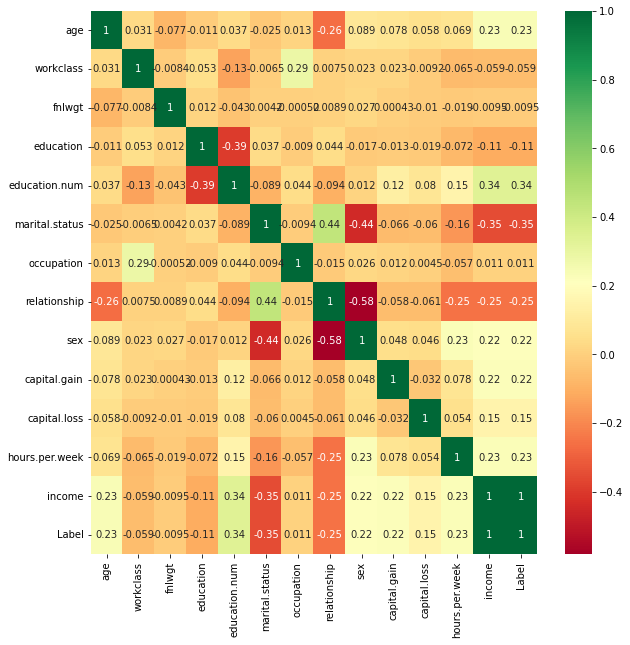

In [ ]:
from typing import Tuple
def show_correlation_graph(adult_df: pd.DataFrame, figsize: Tuple):
    plt.figure(figsize=figsize)
    corrmat = adult_df.corr()
    top_corr_features = corrmat.index
    sns.heatmap(adult_df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
    plt.show()

show_correlation_graph(adult_df,(10,10))

In [ ]:
print("Number of Observations in adult dataset:", adult_df.shape)

Number of Observations in adult dataset: (32561, 16)


In [ ]:
feature_cols = ['workclass', 'education', 'marital.status', 'occupation','relationship','sex','hours.per.week']
X2 = adult_df[feature_cols] # Features
y2 = adult_df.Label # Target variable
print(X2)
type(X2)
type(y2)

       workclass  education  marital.status  occupation  relationship  sex  \
0              5          4               3          14             1    0   
1              2          4               3           3             1    0   
2              5          7               3          14             4    0   
3              2          8               2           6             4    0   
4              2          7               2           9             3    0   
...          ...        ...             ...         ...           ...  ...   
32556          2          7               1          10             1    1   
32557          2          0               0          12             5    0   
32558          2          4               0           6             0    1   
32559          2          4               3           0             4    0   
32560          2          4               1           0             3    1   

       hours.per.week  
0                  40  
1              

pandas.core.series.Series

[[5594  555]
 [ 959 1033]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6149
           1       0.65      0.52      0.58      1992

    accuracy                           0.81      8141
   macro avg       0.75      0.71      0.73      8141
weighted avg       0.80      0.81      0.81      8141



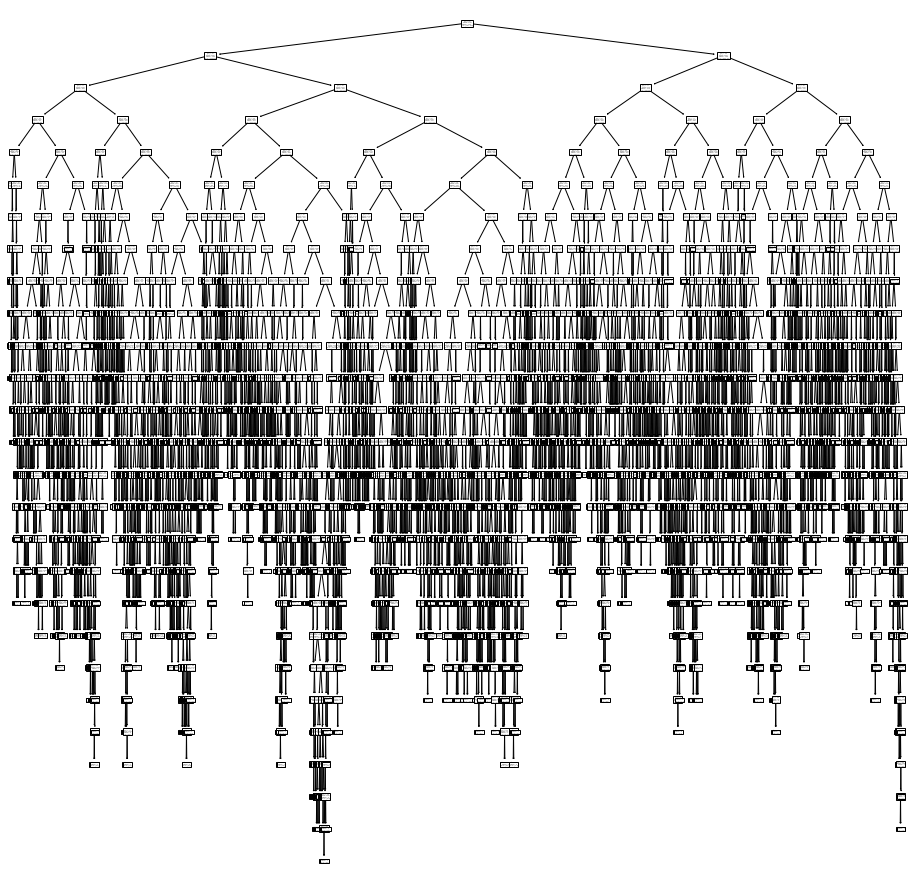

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
predictions= dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
tree.plot_tree(dtree)
plt.rcParams['figure.figsize'] = [16,16]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


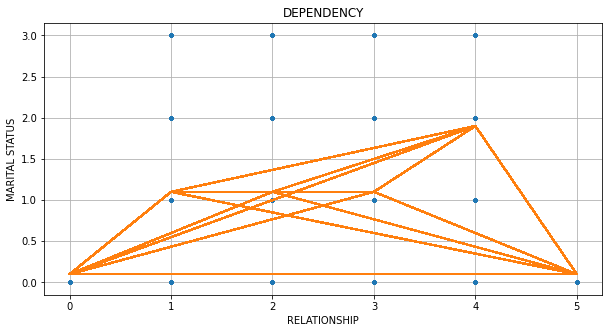

In [ ]:
x = adult_df.relationship
x = [[i] for i in list(x)]
y = adult_df['marital.status']
y = [[i] for i in list(y)]

model = SVR(kernel='rbf', C=1.0)
model.fit(x, y)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x, y, '.')
plt.plot(x, model.predict(x), '--')
plt.xlabel('RELATIONSHIP')
plt.ylabel('MARITAL STATUS')
plt.title("DEPENDENCY")
plt.grid(True)
plt.show()

In [ ]:
y_fit = model.predict(x)
y_fit

array([1.10010901, 1.10010901, 1.89947242, ..., 0.10005306, 1.89947242,
       1.10041541])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_fit)

0.23086727877929908

# ***ANN***

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Initializing ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 100)
# Saving created neural network
ann.save("ANN.h5")

Epoch 1/100
764/764 [==============================] - 3s 2ms/step - loss: 0.5439 - accuracy: 0.7110
Epoch 2/100
764/764 [==============================] - 1s 2ms/step - loss: 0.4494 - accuracy: 0.7636
Epoch 3/100
764/764 [==============================] - 1s 2ms/step - loss: 0.4362 - accuracy: 0.7630
Epoch 4/100
764/764 [==============================] - 2s 3ms/step - loss: 0.4301 - accuracy: 0.7757
Epoch 5/100
764/764 [==============================] - 2s 3ms/step - loss: 0.4252 - accuracy: 0.7826
Epoch 6/100
764/764 [==============================] - 3s 4ms/step - loss: 0.4213 - accuracy: 0.7894
Epoch 7/100
764/764 [==============================] - 1s 2ms/step - loss: 0.4178 - accuracy: 0.7914
Epoch 8/100
764/764 [==============================] - 2s 3ms/step - loss: 0.4149 - accuracy: 0.7925
Epoch 9/100
764/764 [==============================] - 2s 2ms/step - loss: 0.4125 - accuracy: 0.7947
Epoch 10/100
764/764 [==============================] - 1s 2ms/step - loss: 0.4108 - accura

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Initializing ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN

# ann.fit(X_train,y_train,batch_size=32,epochs = 100)
ann.fit(X_train, y_train, validation_data = (X_test,y_test),epochs = 100, callbacks = EarlyStopping(monitor="val_loss"))

# Saving created neural network
ann.save("ANN.h5")

# history = ann.fit(X_train, y_train, validation_data = (X_test,y_test),epochs = 100, callbacks = EarlyStopping(monitor="val_loss"))


Epoch 1/100
764/764 [==============================] - 3s 3ms/step - loss: 0.6015 - accuracy: 0.6998 - val_loss: 0.4649 - val_accuracy: 0.7768
Epoch 2/100
764/764 [==============================] - 2s 2ms/step - loss: 0.4604 - accuracy: 0.7787 - val_loss: 0.4513 - val_accuracy: 0.7783


# ***`EXTRAS`***

In [130]:
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)

classifier_entropy = DecisionTreeClassifier(criterion='gini')
classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# to convert in 2 d data
patient1 = np.array([patient1])     #patient1 1d data 